# 28th of June, 2018
## Benjamin Adam Catching
## Andino Lab Rotation
## Poliovirus DIP Project

**Goal**: Create a class that will take in a file name and the object is the numpy/scipy image.

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

import skimage.filters
import skimage.morphology
import skimage.io
import skimage.segmentation
import skimage.exposure
import skimage.feature

import scipy.ndimage

In [198]:
class Bulk_droplet:
    """Create an image object from the read in file"""
    
    def __init__(self, filename, micron_per_pixel=1, gfp_thresh=0, multi_channel=False,
                testing=False):
        """Initialize the image data"""
        
        # Define input image attributes
        self.filename = filename
        self.image = skimage.io.imread(filename)
        self.micron_per_pixel = micron_per_pixel
        self.gfp_thresh = gfp_thresh
        self.shape = self.image.shape
        self.multi_channel = multi_channel
        
    def droplet_segment(self, testing=False):
        """Return droplets and their properties"""
        
        # If the image has multiple channels, choose the channel to determine droplets from
        if self.multi_channel:
            bright_channel = int(input('Input brightfield channel: '))
            image_bright = (self.image)[:, :, bright_channel]
        else:
            image_bright = self.image

        # Find the Otsu threshold
        bright_thresh_otsu = skimage.filters.threshold_otsu(image_bright)
        
        # Label thesholded images
        bright_threshold = image_bright > bright_thresh_otsu
        image_labeled, number_labels = skimage.measure.label(bright_threshold, background=0, return_num=True)
        
        # Get the properties of the labeled regions
        image_props = skimage.measure.regionprops(image_labeled)

        # Create a blank region of the original image
        blank_background= np.zeros(image_bright.shape)

        # Go through props
        for index, prop in enumerate(image_props):
            #print(prop.area)
            # If the region properties are within the threshold
            if prop.area >= 400 and prop.eccentricity <= 0.90:
                # Select the region
                #print(index)
                temp_seg = image_labeled==index+1
                filled_seg = temp_seg
                # Add the temp region
                blank_background = blank_background + filled_seg
        
        # Fill the holes of the image
        image_droplets = scipy.ndimage.binary_fill_holes(blank_background)
        
        
        # If testing is True, show the image
        if testing:
            with sns.axes_style("dark"):
                # Define the number of pixels in a millimeter
                mm = (1 / self.micron_per_pixel) * 1000

                # Define the number of ticks
                num_x_ticks = (image_bright.shape)[0] // mm + 1
                num_y_ticks = (image_bright.shape)[1] // mm + 1
                plt.imshow(image_droplets)
                plt.xticks(np.arange(0, (image_bright.shape)[0], mm), np.arange(0, num_x_ticks))
                plt.yticks(np.arange(0, (image_bright.shape)[1], mm), np.arange(0, num_y_ticks))
                plt.xlabel("x-axis (mm)")
                plt.ylabel("y-axis (mm)")
                plt.title("Segmented Droplets")
                plt.show()
            
        image_labeled, number_labels = skimage.measure.label(image_droplets, background=0, return_num=True)
        
        # Get the properties of the labeled regions
        image_props = skimage.measure.regionprops(image_labeled)

            
        return image_labeled, image_props
    
    def find_brightfield_cells(self):
        """Return the brightfield cells"""
        
        # Call the labeled black-white droplet image and the associated properties
        image_labeled, image_props = self.droplet_segment()
        
        # Define the droplet images
        labeled_droplets, number_droplets = skimage.measure.label(image_labeled, background=0, return_num=True)
        bright_droplet_props = skimage.measure.regionprops(labeled_droplets, image_bright)
        
        return labeled_droplets, bright_droplet_props

In [199]:
# Test image
test_image = Bulk_droplet("../data/06.27_HeLa-poliovirus/#1/4x_TRANS.tif", micron_per_pixel=2.243,
                gfp_thresh=50, multi_channel=False)

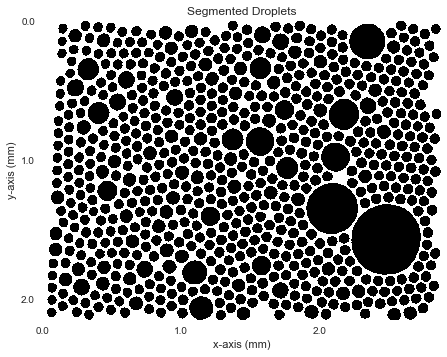

In [161]:
segmented_cell = test_image.droplet_segment(testing=True)

In [177]:
# All 4x brightfield files
brightfield_images = sorted(glob.glob("../data/06.27_HeLa-poliovirus/*/4x_TRANS.tif"))
brightfield_images

['../data/06.27_HeLa-poliovirus/#1/4x_TRANS.tif',
 '../data/06.27_HeLa-poliovirus/#2/4x_TRANS.tif',
 '../data/06.27_HeLa-poliovirus/#3/4x_TRANS.tif',
 '../data/06.27_HeLa-poliovirus/#4/4x_TRANS.tif',
 '../data/06.27_HeLa-poliovirus/#5/4x_TRANS.tif',
 '../data/06.27_HeLa-poliovirus/#6/4x_TRANS.tif']

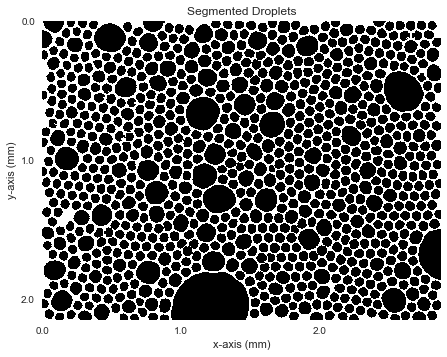

In [186]:
test_1 = Bulk_droplet(brightfield_images[5], micron_per_pixel=2.243)
t1 = test_1.droplet_segment(testing=True)

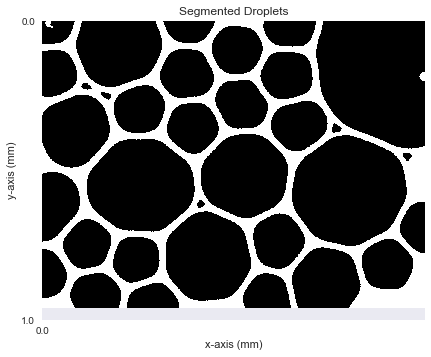

In [190]:
# Look at 10X brightfield images 
bright_4x_1 = Bulk_droplet("../data/06.27_HeLa-poliovirus/#2/10x_TRANS.tif")
droplet_bright_4x_1 = bright_4x_1.droplet_segment(testing=True)

In [200]:
labeled_droplets_4x, droplet_props_4x = bright_4x_1.find_brightfield_cells()

NameError: name 'droplet_segment' is not defined